In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.insert(0,  "/project/remote/pento-diaref")

In [2]:
from matplotlib import pyplot as plt
import os
import h5py
import random
from pentodiaref.data.generation.types import Annotation
data_dir = "/data/pento_diaref/didact"

In [3]:
from tqdm import tqdm

In [10]:
def check_bboxes(data_dir, split_name, category_name=None):
    fn = split_name
    if category_name:
        fn = f"{category_name}_{split_name}"
    annotations = Annotation.load(data_dir, fn)
    file_path = os.path.join(data_dir, fn + ".boards.hdf5")
    errors = 0
    with h5py.File(file_path, "r") as f:
        for annotation in tqdm(annotations):
            anno_id = annotation["id"]
            target_idx = annotation["target"]
            bboxes = annotation["bboxes"]
            pieces = annotation["pieces"]
            refs = annotation["refs"]

            image = f["images"][anno_id]
            (x,xx,y,yy) = bboxes[target_idx]
            image_crop = image[min(y-3,0):max(yy+3,224), min(x-3,0):max(xx+3, 224)]
            
            if 0 in image_crop.shape:
                print("Detected wrong image_crop:", image_crop.shape)
                print("Target bbox:", bboxes[target_idx])
                print()
                for ref in refs:
                    print("Instr :",ref["instr"], "(Type:", ref["type"], ")")
                print()
                for p, bb in zip(pieces, bboxes):
                    print(p, bb)
                print()
                plt.figure(figsize=(10,10))
                plt.imshow(image)
                plt.show()
                print()
                errors += 1
    print("Found errors:", errors)
check_bboxes(data_dir, "val", "ho-color")

Loaded 756 from /data/pento_diaref/didact/ho-color_val.json


100%|██████████| 756/756 [00:00<00:00, 2445.06it/s]

Found errors: 0


In [4]:
annotations = Annotation.load(data_dir, "data_train", resolve=True)

Resolve data types


100%|██████████| 128526/128526 [00:08<00:00, 15865.42it/s]


Loaded 128526 from /data/pento_diaref/didact/data_train.json


In [5]:
annotations += Annotation.load(data_dir, "data_val", resolve=True)
annotations += Annotation.load(data_dir, "data_test", resolve=True)

Resolve data types


100%|██████████| 10000/10000 [00:00<00:00, 23436.71it/s]


Loaded 10000 from /data/pento_diaref/didact/data_val.json
Resolve data types


100%|██████████| 10000/10000 [00:00<00:00, 23171.89it/s]

Loaded 10000 from /data/pento_diaref/didact/data_test.json


In [6]:
from collections import defaultdict

In [7]:
by_group_id = defaultdict(list)
for a in annotations:
    by_group_id[a.group_id].append(a)

In [8]:
len(by_group_id)

42000

In [27]:
less = sum([1 for k in by_group_id if len(by_group_id[k]) < 4])
less

15314

In [9]:
def check_random_sample(selection, data_dir, fn):
    file_path = os.path.join(data_dir, fn + ".boards.hdf5")
    with h5py.File(file_path, "r") as f:
        for annotation in selection:
            if isinstance(annotation, Annotation):
                annotation = annotation.to_json()
            anno_id = annotation["id"]
            group_id = annotation["group_id"]
            bboxes = annotation["bboxes"]
            pieces = annotation["pieces"]
            target = annotation["target"]
            refs = annotation["refs"]
            
            for ref in refs:
                print("Target :",target)
                print("Instr :",ref["instr"])
                print("Type  :",ref["type"])
            
            for p, bb in zip(pieces, bboxes):
                print(p, bb)

            images = f["images"]
            image = images[group_id]
            print("Image:", image.shape)
            
            plt.figure(figsize=(3,3))
            (x,xx,y,yy) = bboxes[target]
            plt.imshow(image[y-3:yy+3, x-3:xx+3])
            plt.show()
            
            plt.figure(figsize=(10,10))
            plt.imshow(image)
            plt.show()


Target : 4
Instr : Take the blue piece in the top center
Type  : 2
('blue', 'F', 'right center', 0) [179, 201, 97, 119]
('brown', 'F', 'right center', 0) [186, 209, 119, 141]
('blue', 'F', 'top right', 90) [179, 201, 37, 59]
('blue', 'F', 'left center', 90) [7, 29, 89, 112]
('blue', 'F', 'top center', 0) [82, 104, 59, 82]
('blue', 'F', 'left center', 90) [37, 59, 82, 104]
('blue', 'F', 'top right', 90) [194, 216, 59, 82]
('blue', 'F', 'center', 180) [97, 119, 141, 164]
('blue', 'F', 'bottom right', 180) [156, 179, 186, 209]
('blue', 'F', 'top left', 90) [52, 74, 52, 74]
Image: (224, 224, 3)


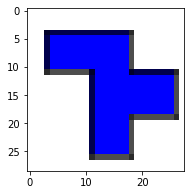

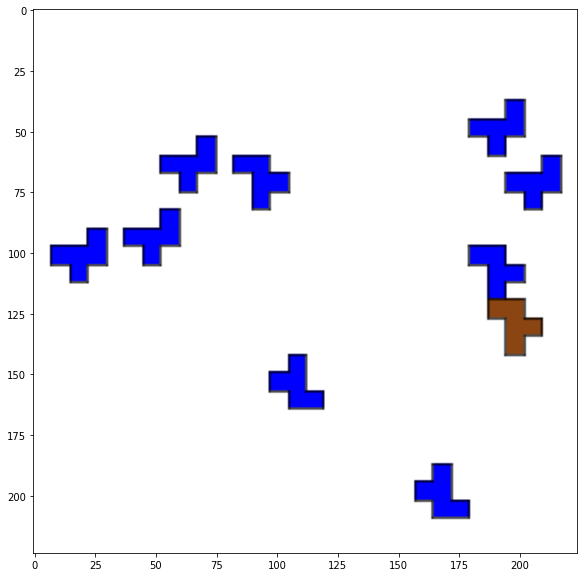

Target : 6
Instr : Take the blue piece in the top right
Type  : 2
('blue', 'F', 'right center', 0) [179, 201, 97, 119]
('brown', 'F', 'right center', 0) [186, 209, 119, 141]
('blue', 'F', 'top right', 90) [179, 201, 37, 59]
('blue', 'F', 'left center', 90) [7, 29, 89, 112]
('blue', 'F', 'top center', 0) [82, 104, 59, 82]
('blue', 'F', 'left center', 90) [37, 59, 82, 104]
('blue', 'F', 'top right', 90) [194, 216, 59, 82]
('blue', 'F', 'center', 180) [97, 119, 141, 164]
('blue', 'F', 'bottom right', 180) [156, 179, 186, 209]
('blue', 'F', 'top left', 90) [52, 74, 52, 74]
Image: (224, 224, 3)


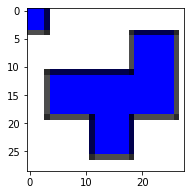

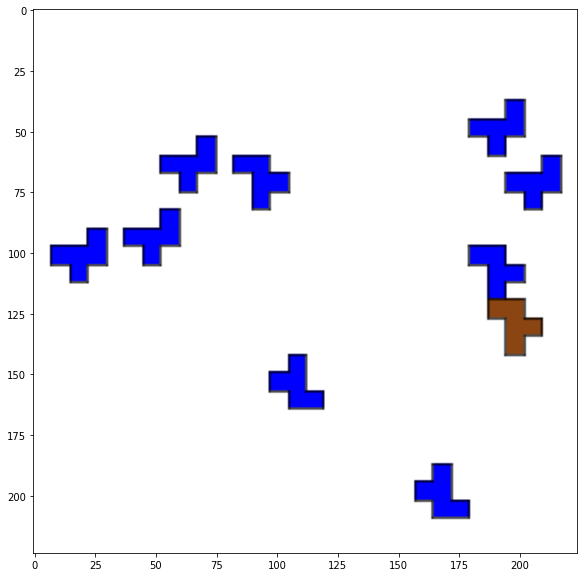

Target : 7
Instr : Take the blue piece in the center
Type  : 2
('blue', 'F', 'right center', 0) [179, 201, 97, 119]
('brown', 'F', 'right center', 0) [186, 209, 119, 141]
('blue', 'F', 'top right', 90) [179, 201, 37, 59]
('blue', 'F', 'left center', 90) [7, 29, 89, 112]
('blue', 'F', 'top center', 0) [82, 104, 59, 82]
('blue', 'F', 'left center', 90) [37, 59, 82, 104]
('blue', 'F', 'top right', 90) [194, 216, 59, 82]
('blue', 'F', 'center', 180) [97, 119, 141, 164]
('blue', 'F', 'bottom right', 180) [156, 179, 186, 209]
('blue', 'F', 'top left', 90) [52, 74, 52, 74]
Image: (224, 224, 3)


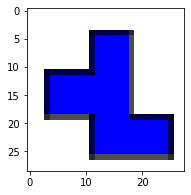

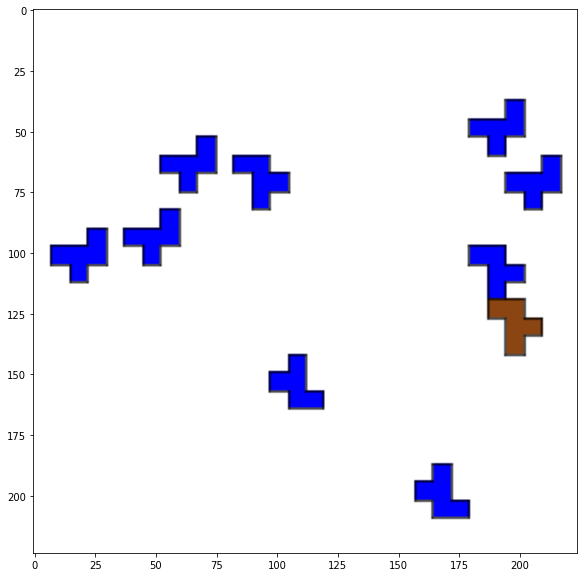

Target : 0
Instr : Take the blue piece in the right center
Type  : 2
('blue', 'F', 'right center', 0) [179, 201, 97, 119]
('brown', 'F', 'right center', 0) [186, 209, 119, 141]
('blue', 'F', 'top right', 90) [179, 201, 37, 59]
('blue', 'F', 'left center', 90) [7, 29, 89, 112]
('blue', 'F', 'top center', 0) [82, 104, 59, 82]
('blue', 'F', 'left center', 90) [37, 59, 82, 104]
('blue', 'F', 'top right', 90) [194, 216, 59, 82]
('blue', 'F', 'center', 180) [97, 119, 141, 164]
('blue', 'F', 'bottom right', 180) [156, 179, 186, 209]
('blue', 'F', 'top left', 90) [52, 74, 52, 74]
Image: (224, 224, 3)


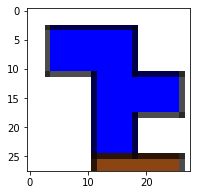

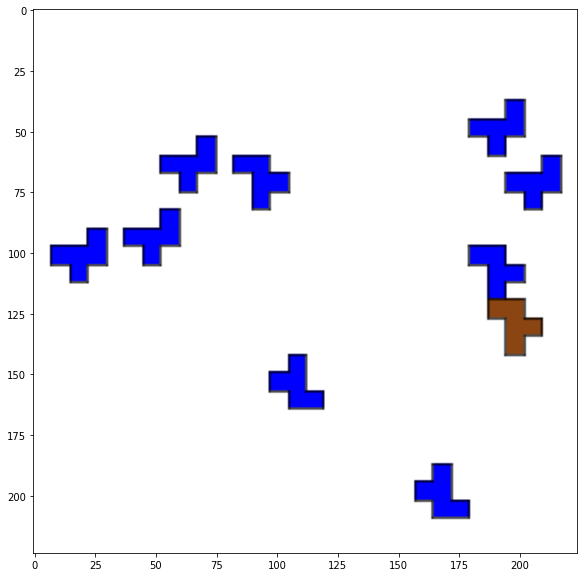

In [11]:
check_random_sample(by_group_id[2], data_dir, "data")

In [ ]:
def load_random_selection():    
    fn = split_name
    if category_name:
        fn = f"{category_name}_{split_name}"
    annotations = load(data_dir, fn)
    selection = annotations[:4] 
    #selection = random.choice(annotations[:10])
    #selection = random.sample(annotations[:100], 5)
check_random_sample(data_dir, "val", "ho-color")